## Langchain Version V1
### Basic Agents

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

c:\Coding\AI_ML_DL\genAI-with-langchain\langchain-antigravity\.venv\Lib\site-packages\langchain_core\_api\deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


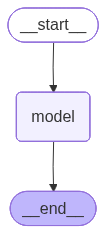

In [2]:
from langchain.agents import create_agent
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0
)

agent = create_agent(
    model=llm,
    tools=[],
    system_prompt="You are a helpful assistant.",
)

agent

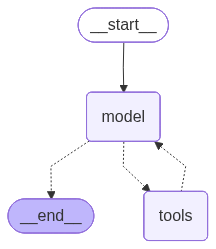

In [3]:
from langchain.agents import create_agent
from langchain_groq import ChatGroq

llm = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0
)

def get_wether(city: str) -> str:
    """Get a wether forecast for a city"""
    return f"The weather in {city} is sunny."

agent = create_agent(
    model=llm,
    tools=[get_wether],
    system_prompt="You are a helpful assistant.",
)

agent

In [4]:
response = agent.invoke({"messages": [{"role":"user", "content": "What is weather for Noida city??"}]})

In [5]:
response

{'messages': [HumanMessage(content='What is weather for Noida city??', additional_kwargs={}, response_metadata={}, id='d8c95035-203d-4cb7-869c-bc780ec6e961'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'xwfkyzhxp', 'function': {'arguments': '{"city":"Noida"}', 'name': 'get_wether'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 233, 'total_tokens': 250, 'completion_time': 0.018782, 'completion_tokens_details': None, 'prompt_time': 0.014457234, 'prompt_tokens_details': None, 'queue_time': 0.049980366, 'total_time': 0.033239234}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bbbf7-76dd-74d2-8ba5-e3d611199bfd-0', tool_calls=[{'name': 'get_wether', 'args': {'city': 'Noida'}, 'id': 'xwfkyzhxp', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_token

In [6]:
response['messages'][-2].content

'The weather in Noida is sunny.'

In [7]:
response['messages'][-1].content

'However, I am unable to provide real-time information.'

In [ ]:
agent.invoke({'messages':'What is the wether of delhi city??'})